### --------------------------------------------------------------------------------------------------------------------------------------------------------------

#  $$Mall Customers Segmentation$$

###  -------------------------------------------------------------------------------------------------------------------------------------------------------------

## $ Objective - $
### Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.

##  

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
neigh_scaled = NearestNeighbors(n_neighbors=2)
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib import style

### Reading and previewing the file

In [2]:
Mall_df=pd.read_csv("C:/Users/Lenovo/Documents/DS3_C6_S3_MallCustomers_Data_Project.csv")
Mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Structure of Data

In [3]:
Mall_df.shape

(200, 5)

### Information and descripltion of data

In [4]:
categorical=[]
numerical=[]
for i in Mall_df:
    if Mall_df[i].nunique()<40:
        categorical.append(i)
    else:
        numerical.append(i)

In [5]:
print(tabulate({"Categorical":categorical,
                "continuous": numerical}, headers = ["categorical_Columns", "continuous_Columns"],tablefmt='grid'))

+-----------------------+------------------------+
| categorical_Columns   | continuous_Columns     |
+=======================+========================+
| Gender                | CustomerID             |
+-----------------------+------------------------+
|                       | Age                    |
+-----------------------+------------------------+
|                       | Annual Income (k$)     |
+-----------------------+------------------------+
|                       | Spending Score (1-100) |
+-----------------------+------------------------+


In [6]:
Mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


#### Droping the customer ID as it is not much important for further analysis

In [7]:
Mall_df.drop('CustomerID',axis=1,inplace=True)
Mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Check for Null values

In [8]:
Mall_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data don't have any null values

# $$ Univariate Analysis $$

## For categorical features 

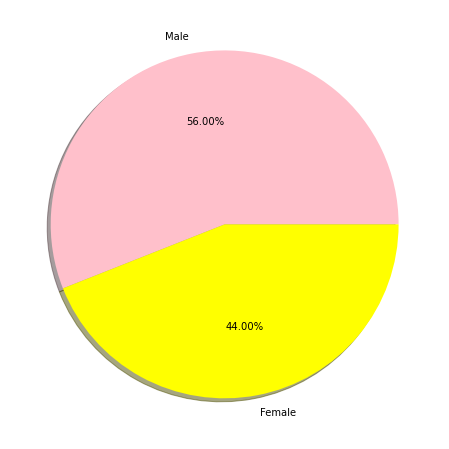

In [9]:
plt.figure(figsize=(15,8))
plt.pie(Mall_df['Gender'].value_counts(),labels=Mall_df['Gender'].unique(),autopct='%0.2f%%',shadow=True,colors=['pink','yellow'])
plt.show()

### 56% Customers are Male while 44% are Female

##  

## For Numerical Features :

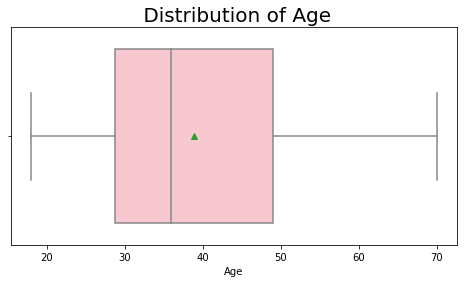

*****************************************************************************************************************************


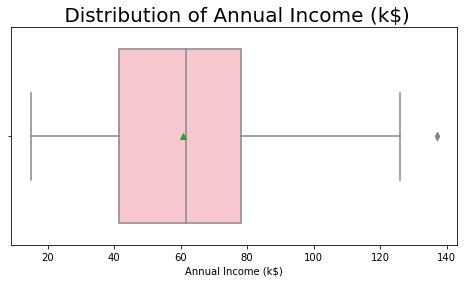

*****************************************************************************************************************************


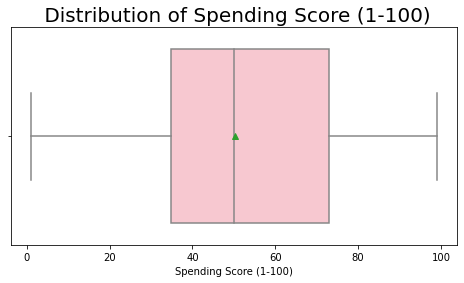

*****************************************************************************************************************************


In [10]:
for i in numerical:
    if i !='CustomerID':
        plt.figure(figsize=(8,4))
        sns.boxplot(Mall_df[i],color='pink',showmeans=True)
        plt.title(f' Distribution of {i}',fontsize=20)
        plt.show()
        print('*****************************************************************************************************************************')

## $Observations$

### Age : 

##### 1. Min age is around 18
##### 2. Max age is around 70
##### 3. Most of the customers are between 28 to 48
##### 4. Age distribution is Right skewed

### Annual Income :

##### 1. Min Annual income is around 80 K
##### 2. Max  Annual income is around 125 K
##### 3. Most of the customers are between 40K to 80K
##### 4.  Annual income distribution is normally distributed

### Spending Score :

##### 1. Min score  is around 0
##### 2. Max   score is around 100
##### 3. Most of the customers are between 35 to 75
##### 4.  score  distribution is normally distributed

# $$ Bivariate Analysis $$

### Numerical to Numerical :

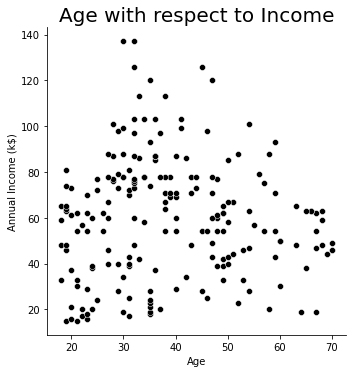

In [11]:
sns.relplot(x=Mall_df['Age'],y=Mall_df['Annual Income (k$)'],ci=False,color='k')
plt.title('Age with respect to Income',fontsize=20)
plt.show()

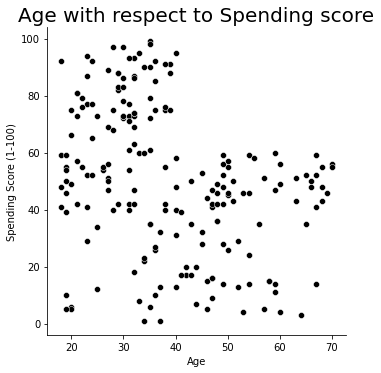

In [12]:
sns.relplot(x=Mall_df['Age'],y=Mall_df['Spending Score (1-100)'],ci=False,color='k')
plt.title('Age with respect to Spending score',fontsize=20)
plt.show()

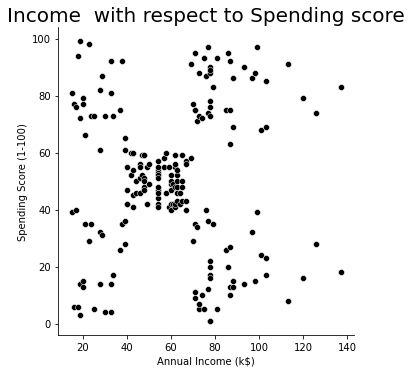

In [13]:
sns.relplot(x=Mall_df['Annual Income (k$)'],y=Mall_df['Spending Score (1-100)'],ci=False,color='k')
plt.title('Income  with respect to Spending score',fontsize=20)
plt.show()

## $ Observations$

##### 1. Age between 30 - 40 have highest income than other age groups
##### 2. As the age is increasing spending score is decreasing
##### 3. Spending scores of all the Income groups are mostly same except Income between 40 - 60 K

#  

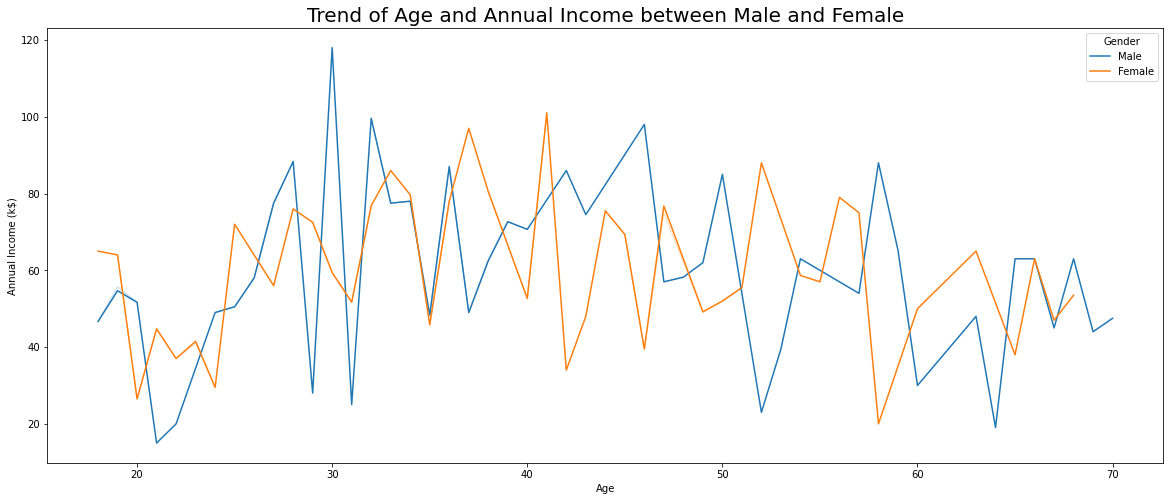

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(x=Mall_df['Age'],y=Mall_df['Annual Income (k$)'],ci=False,color='k',hue=Mall_df['Gender'])
plt.title('Trend of Age and Annual Income between Male and Female',fontsize=20)
plt.show()

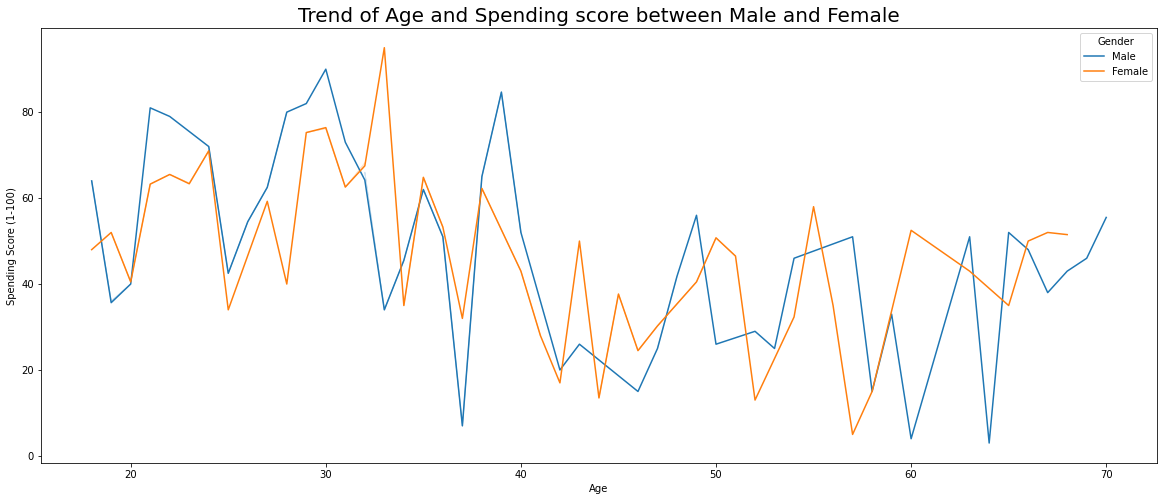

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(x=Mall_df['Age'],y=Mall_df['Spending Score (1-100)'],ci=False,color='k',hue=Mall_df['Gender'])
plt.title('Trend of Age and Spending score between Male and Female',fontsize=20)
plt.show()

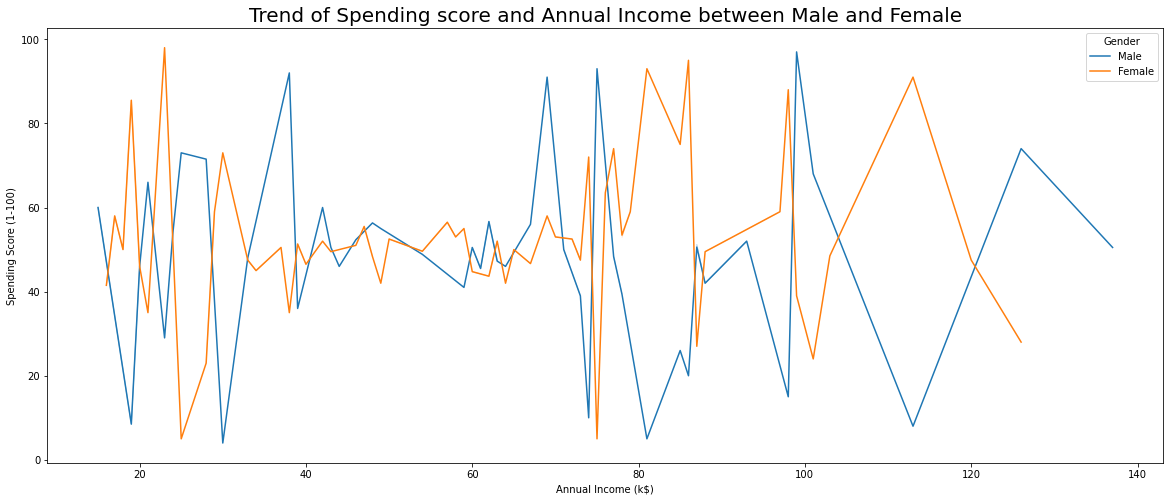

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(x=Mall_df['Annual Income (k$)'],y=Mall_df['Spending Score (1-100)'],ci=False,color='k',hue=Mall_df['Gender'])
plt.title('Trend of Spending score and Annual Income between Male and Female',fontsize=20)
plt.show()

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

# $$ Insights $$

### > 56% Customers are Male while 44% are Female
### >  Min age is around 18
### > Max age is around 70
### > Most of the customers are between 28 to 48
### >  Age distribution is Right skewed
### > Min Annual income is around 80 K
### > Max  Annual income is around 125 K
### > Most of the customers are between 40K to 80K
### > Annual income distribution is normally distributed
### > Min score  is around 0
### > Max   score is around 100
### > Most of the customers are between 35 to 75
### >  score  distribution is normally distributed
### >  Age between 30 - 40 have highest income than other age groups
### > As the age is increasing spending score is decreasing
### > Spending scores of all the Income groups are mostly same except Income between 40 - 60 K



###  ------------------------------------------------------------------------------------------------------------------------------------------------------

# $$ Data Preprocessing $$

## $ Feature Engineering $

### My data contains some categorical features and we have to convert them in numeric form

## Label  encoding :

In [17]:
Label=LabelEncoder()

In [18]:
Mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
Mall_df['Gender']=Label.fit_transform(Mall_df['Gender'])
Mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## $ Feature Scaling $

In [20]:
scale=StandardScaler()

In [21]:
df_=scale.fit_transform(Mall_df)
df_scale=pd.DataFrame(df_,columns=Mall_df.columns)
df_scale.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


### > Correlation metrix

<AxesSubplot:>

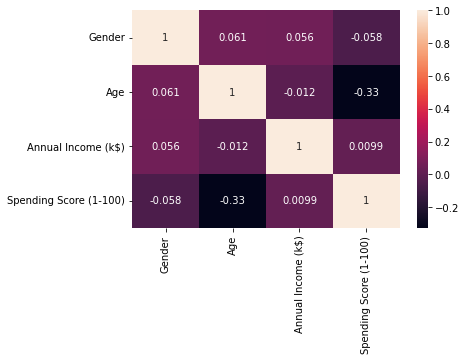

In [22]:
sns.heatmap(df_scale.corr(),annot=True)

# $$ Model  $$

# --------------------------------------------------------------------------------------------------------------

## $$ KMeans Model$$

### > Best  cluster value

In [23]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9]

for n_clusters in range_n_clusters:


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scale)

    silhouette_avg = silhouette_score(df_scale, cluster_labels)
    print("\nFor n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.2518152915788437

For n_clusters = 3 The average silhouette_score is : 0.25951265087431563

For n_clusters = 4 The average silhouette_score is : 0.3012323168801352

For n_clusters = 5 The average silhouette_score is : 0.31437614343154285

For n_clusters = 6 The average silhouette_score is : 0.3199872749106995

For n_clusters = 7 The average silhouette_score is : 0.3581258657368066

For n_clusters = 8 The average silhouette_score is : 0.38738083581583793

For n_clusters = 9 The average silhouette_score is : 0.4022520246824372


### > Define and train the model

In [24]:
kmeans=KMeans(n_clusters=5,random_state=42)

### > Predict the cluster

In [25]:
label=kmeans.fit_predict(df_scale)
label

array([1, 1, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 0, 3, 2, 2, 2, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 3, 1, 3, 1, 4, 1,
       0, 0, 4, 0, 4, 1, 4, 0, 4, 1, 0, 0, 4, 1, 3, 0, 4, 1, 4, 1, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 4, 1, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 1])

### > Evaluation

In [26]:
score = silhouette_score(df_scale, label, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.317


### > Plotting of clusters

In [27]:
df_scale['KMEANS']=label

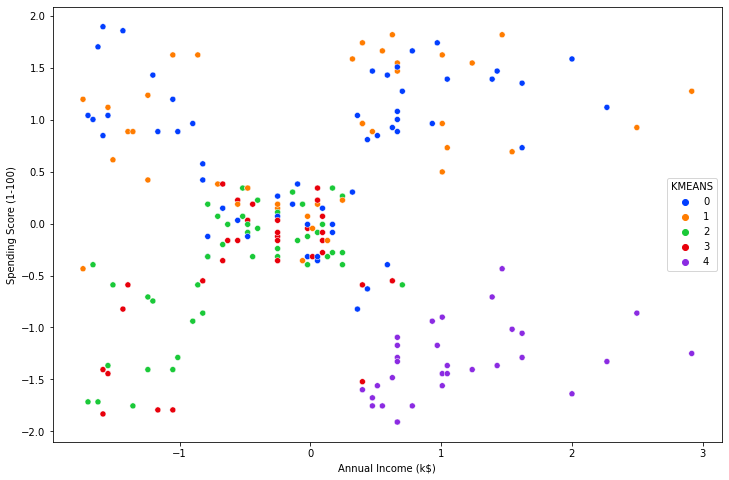

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_scale['Annual Income (k$)'],df_scale['Spending Score (1-100)'],hue=df_scale['KMEANS'],palette='bright');

# ---------------------------------------------------------------------------------------------------------------

## $$  AgglomerativeClustering $$

### > Choosing the best value of cluster

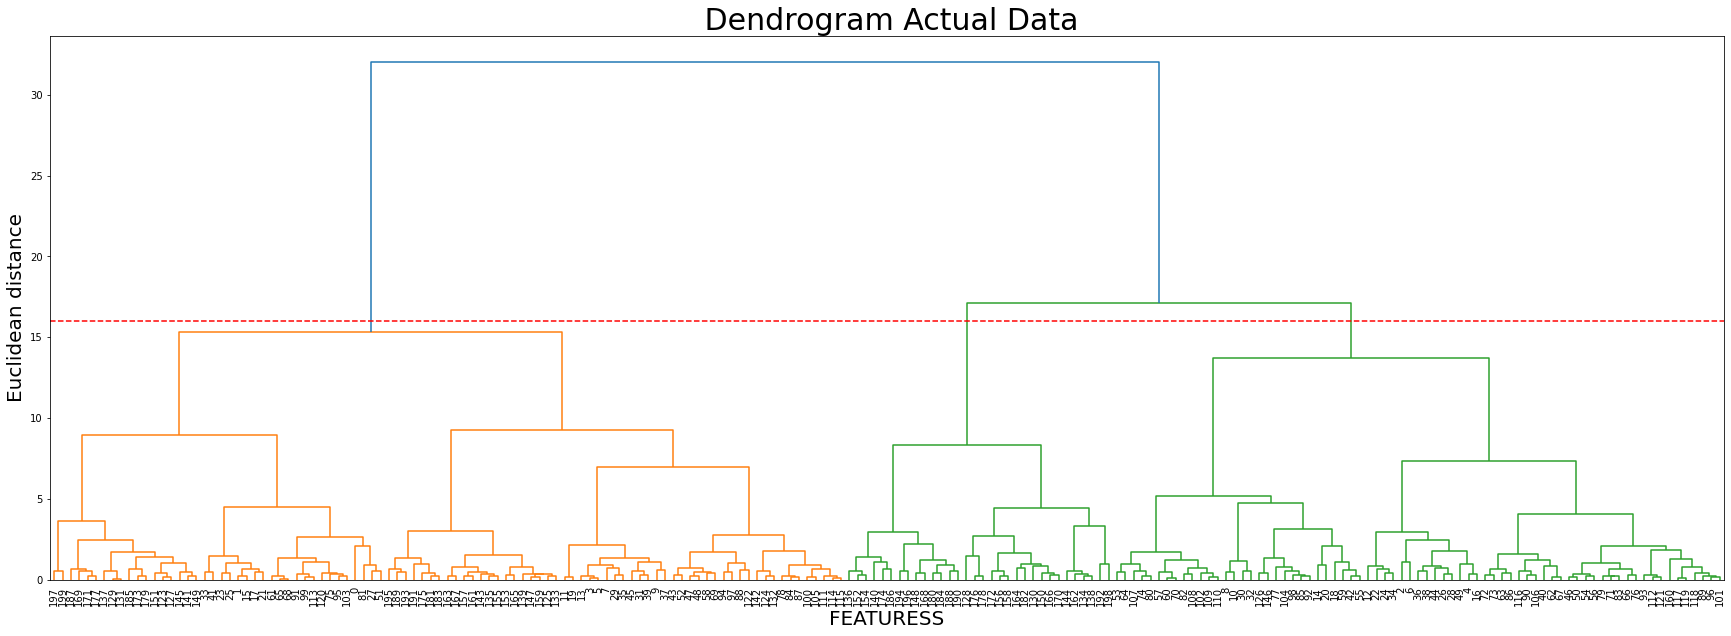

In [29]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scale, method = 'ward'),labels=df_scale.index)
plt.axhline(y=16, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram Actual Data',fontsize=30)
plt.xlabel('FEATURESS',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### > Define and train the model

In [30]:
Agglomerative = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

### > Prediction

In [31]:
y_hc_agg_scaled = Agglomerative.fit_predict(df_scale)
y_hc_agg_scaled

array([2, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 2, 4, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 4, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 4, 2, 0, 0, 1, 1, 1, 1, 2, 4, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int64)

### > Evaluation

In [32]:
score = silhouette_score(df_scale, y_hc_agg_scaled, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.259


### > Plotting the cluster

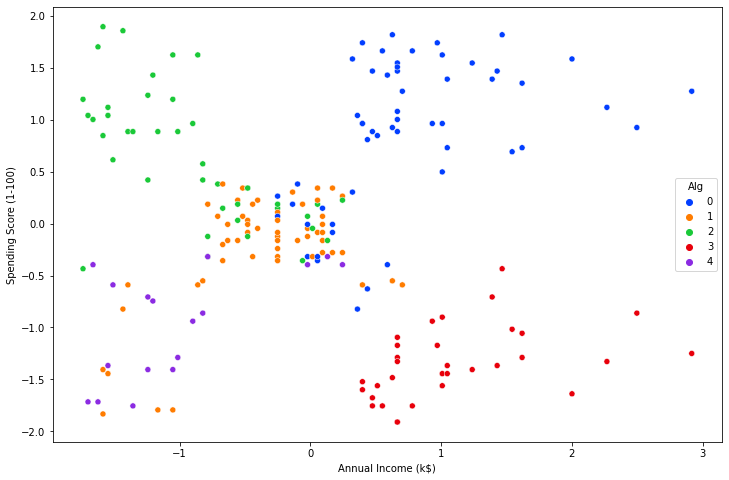

In [33]:
df_scale['Alg']=y_hc_agg_scaled
plt.figure(figsize=(12,8))
sns.scatterplot(df_scale['Annual Income (k$)'],df_scale['Spending Score (1-100)'],hue=df_scale['Alg'],palette='bright');

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## $$ DBSCAN $$

### > Hyperparameter tunning

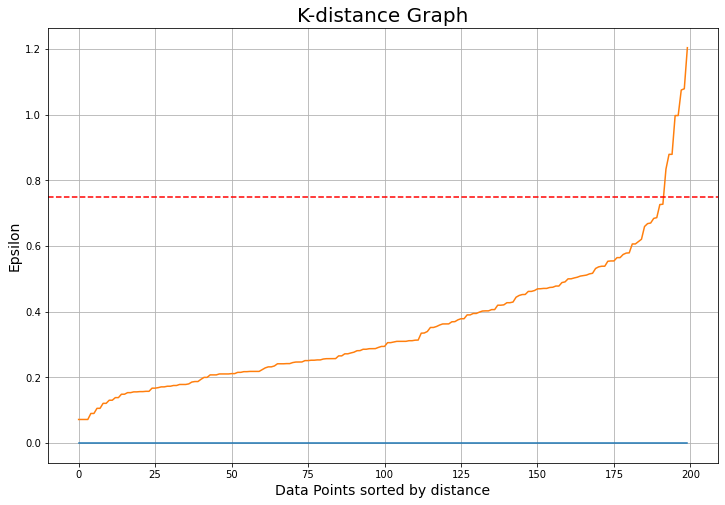

In [34]:
nbrs_scaled = neigh_scaled.fit(df_scale)
distances, indices = nbrs_scaled.kneighbors(df_scale)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.axhline(y=0.75, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

### > Train and predict the model

In [35]:
dbscan_opt=DBSCAN(eps=0.75)
dbscan_opt.fit(df_scale)
df_scale['DBSCAN_opt_labels_SCALED']=dbscan_opt.labels_
df_scale['DBSCAN_opt_labels_SCALED'].value_counts()

 6    36
-1    30
 4    26
 3    24
 0    17
 7    16
 9    12
 5    11
 2    10
 8    10
 1     8
Name: DBSCAN_opt_labels_SCALED, dtype: int64

### > Evaluation

In [36]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, df_scale['DBSCAN_opt_labels_SCALED']))

Silhouette Coefficient: 0.534


### > Plotting of clusters

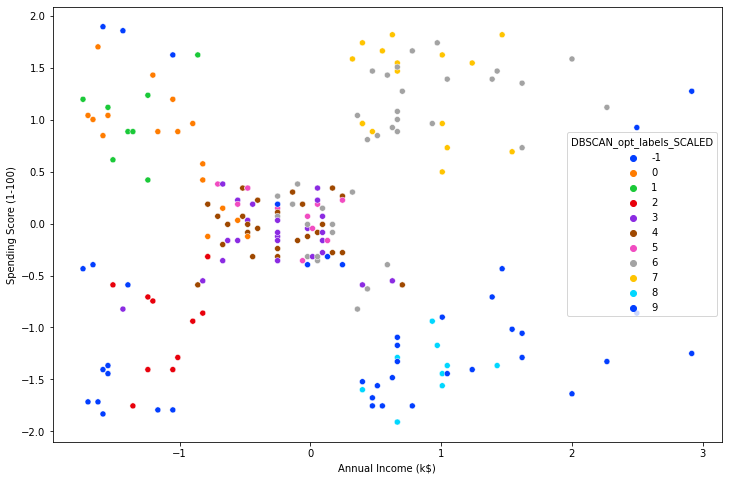

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_scale['Annual Income (k$)'],df_scale['Spending Score (1-100)'],hue=df_scale['DBSCAN_opt_labels_SCALED'],palette='bright');

#  ------------------------------------------------------------------------------------------------------

# > Comparision

In [38]:
Model=['KMeans','Agglomerative','DBSCAN']
Score=[0.317,0.531,0.509]

In [39]:
df=pd.DataFrame({'Clustering model':Model,'Silhoutte score':Score})
df.set_index('Clustering model')

,Silhoutte score
Clustering model,
KMeans,0.317
Agglomerative,0.531
DBSCAN,0.509


<AxesSubplot:xlabel='Clustering model'>

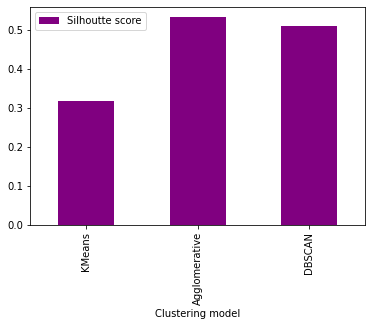

In [40]:
df.plot.bar(x='Clustering model',y='Silhoutte score',color='purple')

## > Agglomerative clustering model is best for our problem as it is doing the less errored clustering with respect to other two

### -------------------------------------------------------------------------------------------------------------------------------------------------------

### > Final cluster

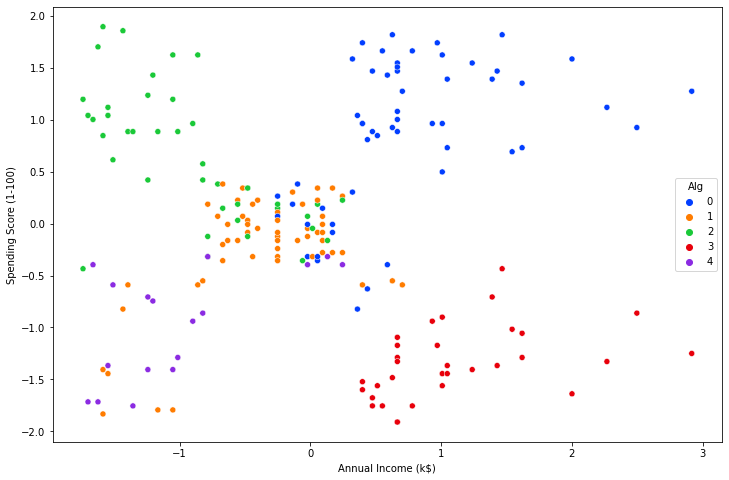

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(df_scale['Annual Income (k$)'],df_scale['Spending Score (1-100)'],hue=df_scale['Alg'],palette='bright');

# > $$Observation$$

### > Cluster 3 for those whose salary is high and spending score is also high
### > Cluster 1 for those whose salary is low and spending score is also low
### > Cluster 4 for those whose salary is high and spending score is low
### > Cluster 0 belongs for those whose salary is low to high but there spending score is low
### > Cluster 2 belongs for those whose salary is low to high but there spending score is almost high